# Simulate two coupled fluxonium spectrum

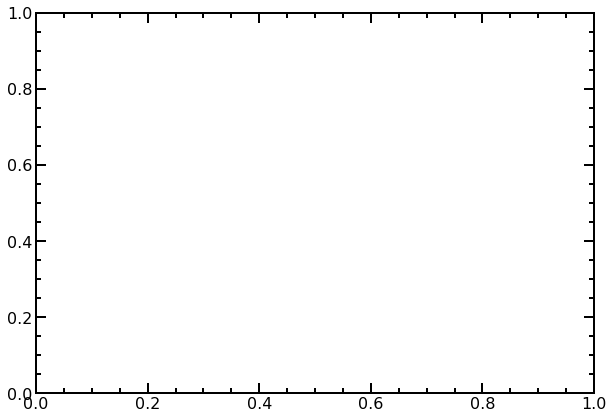

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import ipywidgets as widgets
from matplotlib.widgets import Slider

e = 1.602e-19    #Fundamental charge
h = 6.62e-34    #Placnk's constant
phi_o = h/(2*e) #Flux quantum

## 1. Hamiltonian

In [7]:
def fluxonium_caCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    Hc = J_C*na*nb
    return Ha+Hb+Hc

def fluxonium_inCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_L):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    Hc = -J_L*phi_a*phi_b
    return Ha+Hb+Hc

def fluxonium_dualCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_L, J_C):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    Hc = J_C*na*nb -J_L*phi_a*phi_b
    return Ha+Hb+Hc

## 2. Simulate the coupled spectrum w.r.t. flux

In [3]:
#Parameters
Na = 20
Nb = 20
E_La = 0.6
E_Ca = 1
E_Ja = 3.5
E_Lb = 0.72
E_Cb = 1
E_Jb = 3.5
level_num = 20

In [15]:
phi_ext = np.linspace(0,1,51)
energies_A = np.zeros((len(phi_ext), level_num))
energies_B = np.zeros((len(phi_ext), level_num))
for idx, phi in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(Na, E_La, E_Ca, E_Ja, phi*2*np.pi)
    energies_A[idx, :] = H.eigenenergies()[:level_num]
for idx, phi in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(Nb, E_Lb, E_Cb, E_Jb, phi*2*np.pi)
    energies_B[idx, :] = H.eigenenergies()[:level_num]

0.09784024196198504


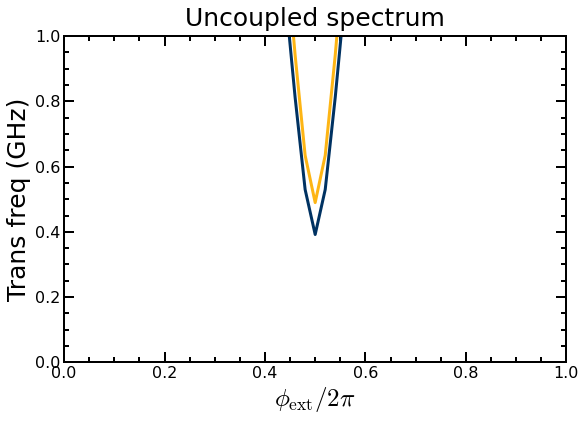

In [19]:
plt.figure(figsize = [9,6])
for idx in range(1,10):
    plt.plot(phi_ext, energies_A[:, idx] - energies_A[:, 0], color = '#003262')
    plt.plot(phi_ext, energies_B[:, idx] - energies_B[:, 0], color = '#FDB515')
plt.xlabel('$\phi_\mathrm{ext}/2\pi$')
plt.ylabel('Trans freq (GHz)')
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.ylim([0,1])
plt.title('Uncoupled spectrum')
freq_anchor = energies_B[25, 1] - energies_B[25, 0] - energies_A[25, 1] + energies_A[25, 0]
print (freq_anchor)

## Capacitive coupling

In [6]:
J_C = 0.2 #GHz
energies_AB = np.zeros((len(phi_ext), level_num))
for idx, phi in enumerate(phi_ext):
    energies_AB[idx,:] = fluxonium_caCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C).eigenenergies()[:level_num]

Text(0.5, 1.0, 'Capacitively coupled')

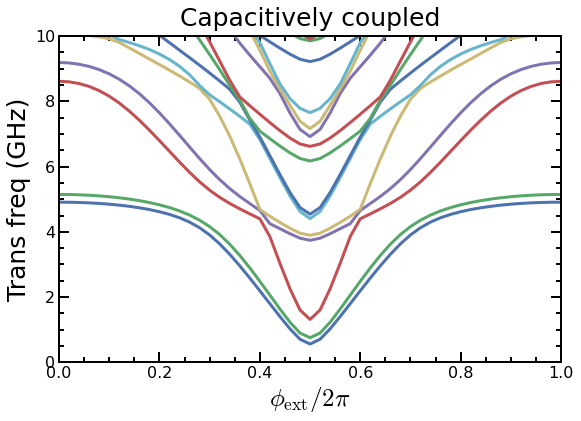

In [7]:
plt.figure(figsize=[9,6])
for idx in range(1,20):
    plt.plot(phi_ext, energies_AB[:, idx] - energies_AB[:, 0])
plt.xlabel('$\phi_\mathrm{ext}/2\pi$')
plt.ylabel('Trans freq (GHz)')
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.ylim([0,10])
plt.title('Capacitively coupled')

In [23]:
phi = 0.5
J_C_array = np.linspace(0,0.5,51)
energies_capa = np.zeros((len(J_C_array), level_num))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_caCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C).eigenenergies()
    energies_capa[idx_JC,:] = levels[0:level_num]

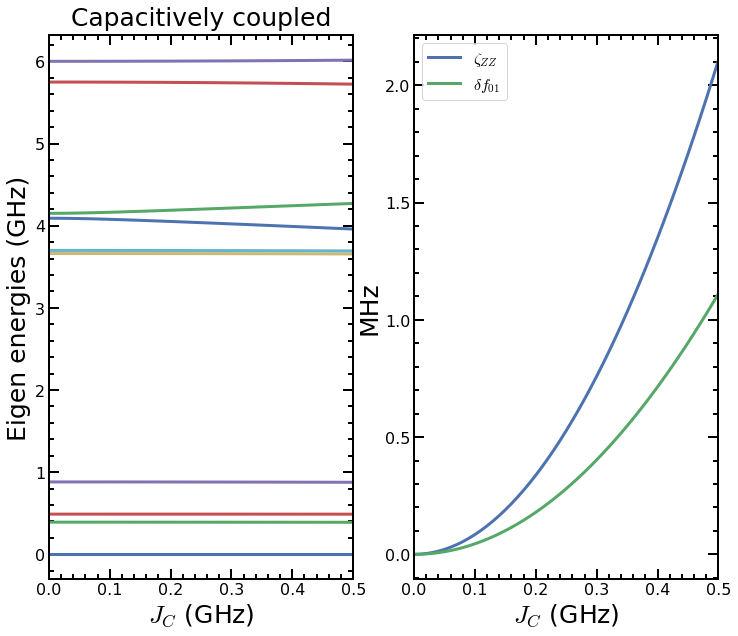

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(10):
    ax1.plot(J_C_array, energies_capa[:, idx]-energies_capa[:, 0])
ax1.set_xlabel('$J_C$ (GHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_capa[:, 3]-energies_capa[:, 1] - energies_capa[:, 2]+energies_capa[:, 0])
energy_change = abs(energies_capa[:, 2] - energies_capa[:, 1])
energy_change = energy_change - freq_anchor
ax2.plot(J_C_array, zz_rate*1e3, label = '$\zeta_{ZZ}$')
ax2.plot(J_C_array, energy_change*1e3, label='$\delta f_{01}$')

ax2.set_xlabel('$J_C$ (GHz)')
ax2.set_ylabel('MHz')
ax2.set_xlim([J_C_array[0],J_C_array[-1]])
ax2.legend()


## Dual charge flux coupling

In [27]:
phi = 0.5
J_C_array = np.linspace(0,0.1,51)
J_L = 0.01
energies_capa = np.zeros((len(J_C_array), level_num))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_dualCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_L, J_C).eigenenergies()
    energies_capa[idx_JC,:] = levels[0:level_num]

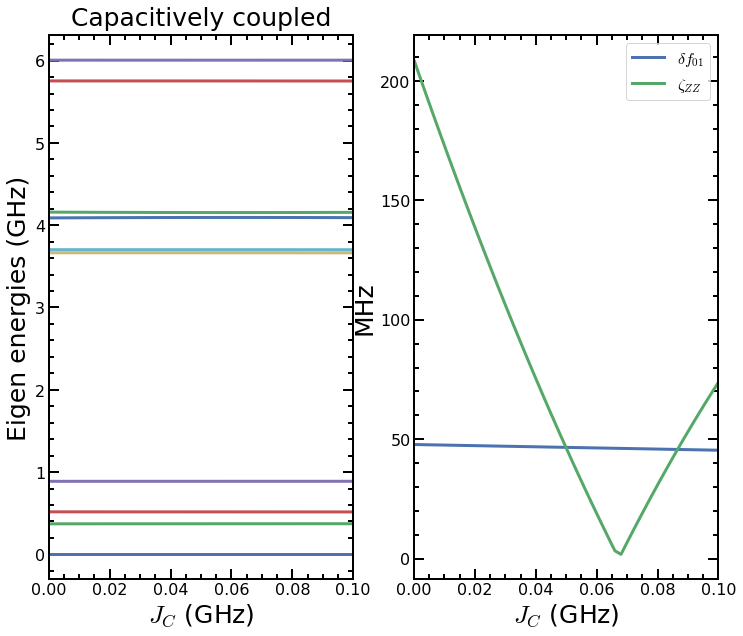

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(10):
    ax1.plot(J_C_array, energies_capa[:, idx]-energies_capa[:, 0])
ax1.set_xlabel('$J_C$ (GHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_capa[:, 3]-energies_capa[:, 1] - energies_capa[:, 2]+energies_capa[:, 0])
energy_change = abs(energies_capa[:, 2] - energies_capa[:, 1])
energy_change = energy_change - freq_anchor
ax2.plot(J_C_array, energy_change*1e3, label='$\delta f_{01}$')
ax2.plot(J_C_array, zz_rate*1e6, label = '$\zeta_{ZZ}$')


ax2.set_xlabel('$J_C$ (GHz)')
ax2.set_ylabel('MHz')
ax2.set_xlim([J_C_array[0],J_C_array[-1]])
ax2.legend()


## 3. Fluxonium-TLS-Fluxonium coupling

In [10]:
def fluxonium_tls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C, w_coupler):
    a = tensor(destroy(Na), qeye(Nb), qeye(2))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb), qeye(2))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    sz = tensor(qeye(Na), qeye(Nb), sigmaz())
    sx = tensor(qeye(Na), qeye(Nb), sigmax())
    H_coupler = w_coupler*sz/2
    Hc = J_C*na*sx + J_C*nb*sx
    return Ha+Hb+Hc+H_coupler

### Coupler 

In [11]:
#Look at coupler above |11>
phi = 0.5
coupler_freq = 1.5
J_C_array = np.linspace(0,0.5,51)
energies_tls = np.zeros((len(J_C_array), level_num))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_tls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, coupler_freq).eigenenergies()
    energies_tls[idx_JC,:] = levels[0:level_num]

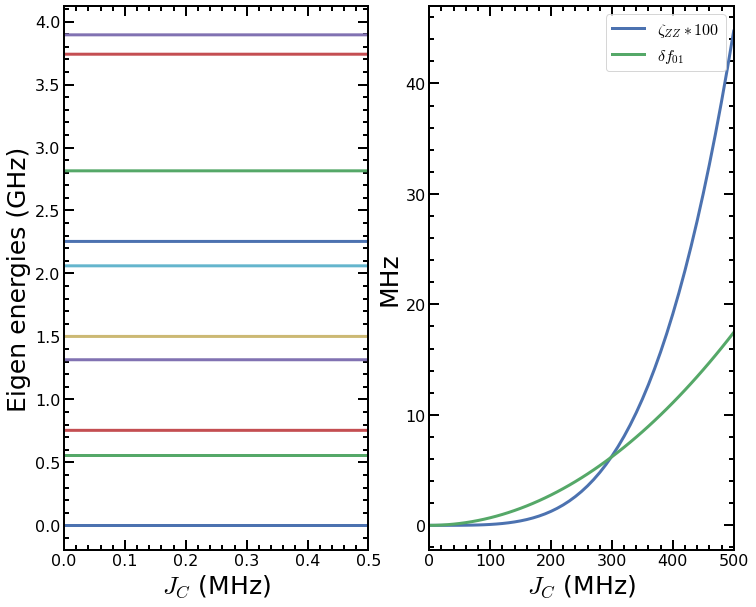

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(10):
    ax1.plot(J_C_array*1e3, energies_tls[:, idx]-energies_tls[:, 0])
ax1.set_xlabel('$J_C$ (MHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
# ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_tls[:, 3]-energies_tls[:, 1] - energies_tls[:, 2]+energies_tls[:, 0])
energy_change = energies_tls[:, 1]-energies_tls[:, 0]
energy_change = abs(energy_change - np.max(energy_change))
ax2.plot(J_C_array*1e3, zz_rate*1e5, label = '$\zeta_{ZZ}*100$')
ax2.plot(J_C_array*1e3, energy_change*1e3, label='$\delta f_{01}$')
ax2.set_xlabel('$J_C$ (MHz)')
ax2.set_ylabel('MHz')
ax2.set_xlim([J_C_array[0]*1e3,J_C_array[-1]*1e3])
ax2.legend()

In [13]:
phi = 0.5
coupler_freq_array = np.linspace(1.5,9.5,81) 
J_C = 0.2
energies_tls_1 = np.zeros((len(coupler_freq_array), level_num))
for idx, coupler_freq in enumerate (coupler_freq_array):
    levels = fluxonium_tls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, coupler_freq).eigenenergies()
    energies_tls_1[idx,:] = levels[0:level_num]

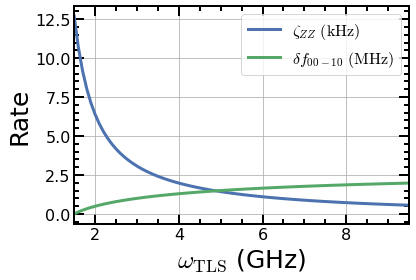

In [14]:
zz_rate = abs(energies_tls_1[:, 3]-energies_tls_1[:, 1] - energies_tls_1[:, 2]+energies_tls_1[:, 0])
energy_change = energies_tls_1[:, 1]-energies_tls_1[:, 0]
energy_change = (energy_change - energy_change[0])
plt.plot(coupler_freq_array, zz_rate*1e6, label = '$\zeta_{ZZ}~(\mathrm{kHz})$')
plt.plot(coupler_freq_array, energy_change*1e3, label='$\delta f_{00-10}~(\mathrm{MHz})$')
plt.xlabel('$\omega_\mathrm{TLS}$ (GHz)')
plt.ylabel('Rate')
plt.xlim([coupler_freq_array[0],coupler_freq_array[-1]])
plt.grid()
plt.legend(prop={'size': 16})

## 4. FLQ - Three level system - FLQ

In [15]:
#the three level system could be a transmon
def hamiltonian_3ls(w,alpha):
    m = np.diag([0.0,1.0,1.0])
    m[1,1] = w
    m[2,2] = 2*w-alpha
    return Qobj(m)

def sigma_3ls():
    m = np.diag(np.ones(2),1) + np.diag(np.ones(2),-1)
    return Qobj(m)

def fluxonium_3ls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C, w_coupler, alpha_coupler):
    a = tensor(destroy(Na), qeye(Nb), qeye(3))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb), qeye(3))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    sx = tensor(qeye(Na), qeye(Nb), sigma_3ls())
    
    H_coupler = tensor(qeye(Na), qeye(Nb),hamiltonian_3ls(w_coupler,alpha_coupler))
    Hc = J_C*na*sx + J_C*nb*sx
    return Ha+Hb+Hc+H_coupler

In [16]:
phi = 0.5
coupler_freq = 2
coupler_anh = 0.3
J_C_array = np.linspace(0,0.5,26)
energies_3ls = np.zeros((len(J_C_array), level_num))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_3ls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, coupler_freq, coupler_anh).eigenenergies()
    energies_3ls[idx_JC,:] = levels[0:level_num]

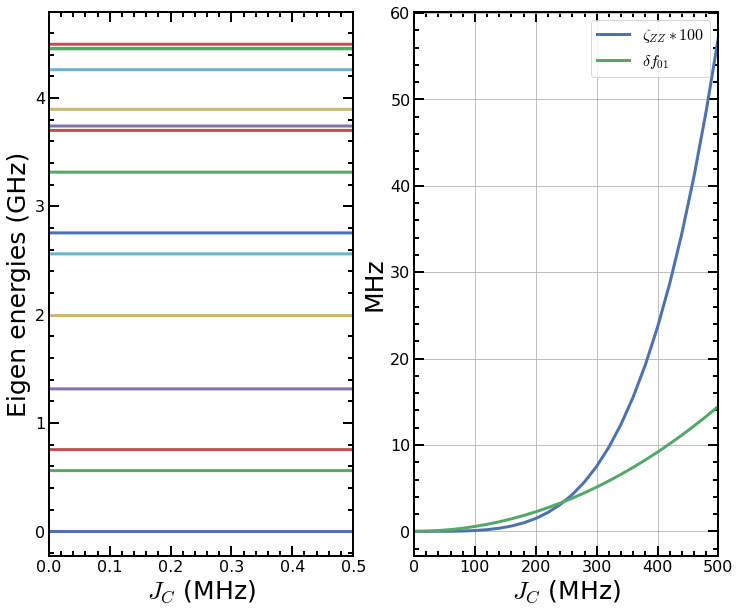

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(15):
    ax1.plot(J_C_array*1e3, energies_3ls[:, idx]-energies_3ls[:, 0])
ax1.set_xlabel('$J_C$ (MHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
# ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_3ls[:, 3]-energies_3ls[:, 1] - energies_3ls[:, 2]+energies_3ls[:, 0])
energy_change = energies_3ls[:, 1]-energies_3ls[:, 0]
energy_change = abs(energy_change - np.max(energy_change))
ax2.plot(J_C_array*1e3, zz_rate*1e5, label = '$\zeta_{ZZ}*100$')
ax2.plot(J_C_array*1e3, energy_change*1e3, label='$\delta f_{01}$')
ax2.set_xlabel('$J_C$ (MHz)')
ax2.set_ylabel('MHz')
ax2.set_xlim([J_C_array[0]*1e3,J_C_array[-1]*1e3])
ax2.grid()
ax2.legend()

In [18]:
Na = 20
Nb = 20
phi = 0.5
coupler_freq_array = np.linspace(1.5,9.5,21)
coupler_anh = 0.3
J_C = 0.3
energies_3ls = np.zeros((len(coupler_freq_array), level_num))
for idx_w, coupler_freq in enumerate (coupler_freq_array):
    levels = fluxonium_3ls_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, coupler_freq, coupler_anh).eigenenergies()
    energies_3ls[idx_w,:] = levels[0:level_num]

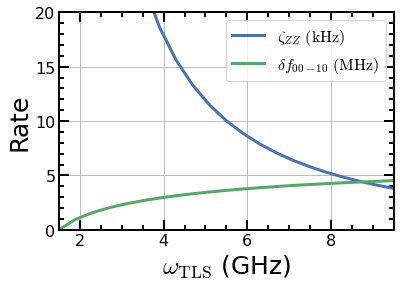

In [19]:
zz_rate = abs(energies_3ls[:, 3]-energies_3ls[:, 1] - energies_3ls[:, 2]+energies_3ls[:, 0])
energy_change = energies_3ls[:, 1]-energies_3ls[:, 0]
energy_change = energy_change - energy_change[0]
plt.plot(coupler_freq_array, zz_rate*1e6, label = '$\zeta_{ZZ}~(\mathrm{kHz})$')
plt.plot(coupler_freq_array, energy_change*1e3, label='$\delta f_{00-10}~(\mathrm{MHz})$')
plt.xlabel('$\omega_\mathrm{TLS}$ (GHz)')
plt.ylabel('Rate')
plt.xlim([coupler_freq_array[0],coupler_freq_array[-1]])
plt.grid()
plt.ylim([0,20])
plt.legend(prop={'size': 16})

## 5. Fluxonium - resonator - fluxonium

In [20]:
def fluxonium_res_hamiltonian(Na, Nb, Nr, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, g, w_r):
    a = tensor(destroy(Na), qeye(Nb), qeye(Nr))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb), qeye(Nr))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    a_res = tensor(qeye(Na), qeye(Nb), destroy(Nr))
    H_res = w_r*(a_res.dag()*a_res +0.5)
    
    Hc = g*na*(a_res + a_res.dag()) + g*nb*(a_res + a_res.dag())
    return Ha+Hb+Hc+H_res

In [21]:
phi = 0.5
Na = 15
Nb = 15
Nr = 4
res_freq = 8
J_C_array = np.linspace(0,0.5,11)
energies_res = np.zeros((len(J_C_array), level_num))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_res_hamiltonian(Na, Nb, Nr, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, res_freq).eigenenergies()
    energies_res[idx_JC,:] = levels[0:level_num]

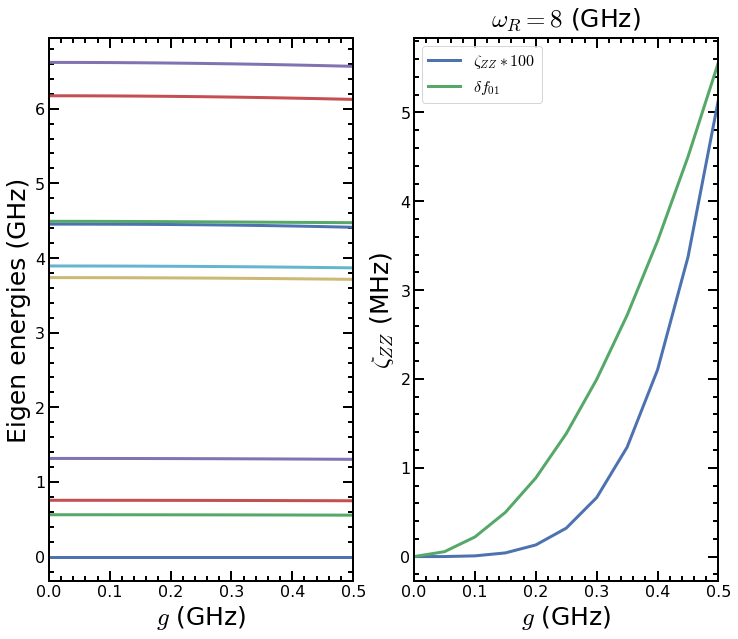

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(10):
    ax1.plot(J_C_array, energies_res[:, idx]-energies_res[:, 0])
ax1.set_xlabel('$g$ (GHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([J_C_array[0], J_C_array[-1]])
# ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_res[:, 3]-energies_res[:, 1] - energies_res[:, 2]+energies_res[:, 0])
energy_change = energies_res[:, 1]-energies_res[:, 0]
energy_change = abs(energy_change - np.max(energy_change))
ax2.plot(J_C_array, zz_rate*1e5, label = '$\zeta_{ZZ}*100$')
ax2.plot(J_C_array, energy_change*1e3, label='$\delta f_{01}$')
ax2.set_xlabel('$g$ (GHz)')
ax2.set_ylabel('$\zeta_{ZZ}$ (MHz)')
ax2.set_xlim([J_C_array[0],J_C_array[-1]])
ax2.set_title('$\omega_R=8$ (GHz)')
ax2.legend()

In [23]:
Na = 20
Nb = 20
Nr = 4
res_freq_array = np.linspace(4,10,25)
J_C = 0.3
energies_res_1 = np.zeros((len(res_freq_array), level_num))
for idx_freq, res_freq in enumerate (res_freq_array):
    levels = fluxonium_res_hamiltonian(Na, Nb, Nr, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, res_freq).eigenenergies()
    energies_res_1[idx_freq,:] = levels[0:level_num]

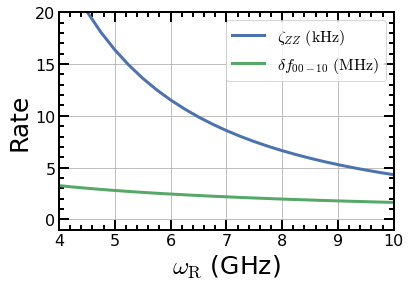

In [24]:
zz_rate = abs(energies_res_1[:, 3]-energies_res_1[:, 1] - energies_res_1[:, 2]+energies_res_1[:, 0])
energy_change = energies_res_1[:, 1]-energies_res_1[:, 0]
# energy_change = energy_change - energy_change[0]
energy_change = abs(energy_change - 0.5605)
plt.plot(res_freq_array, zz_rate*1e6, label = '$\zeta_{ZZ}~(\mathrm{kHz})$')
plt.plot(res_freq_array, energy_change*1e3, label='$\delta f_{00-10}~(\mathrm{MHz})$')
plt.xlabel('$\omega_\mathrm{R}$ (GHz)')
plt.ylabel('Rate')
plt.xlim([res_freq_array[0],res_freq_array[-1]])
plt.grid()
plt.ylim([-1,20])
plt.legend(prop={'size': 16})

## 6. FLQ - SQUID - FLQ

In [26]:
Na = 15
Nb = 15
Nsquid = 20
phi_ext = np.pi
J_C = 0.3
E_Cc = 0.2
E_Jsum = 22
d=0.05

a = tensor(destroy(Na), qeye(Nb), qeye(2*Nsquid+1))
phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

b = tensor(qeye(Na), destroy(Nb), qeye(2*Nsquid+1))
phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)

ope_a = 1.0j * (phi_a - phi_ext)
Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
ope_b = 1.0j * (phi_b - phi_ext)
Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())

#charge qubit
n = Qobj(np.diag(np.arange(-Nsquid, Nsquid+1)))
nc = tensor(qeye(Na), qeye(Nb), n)
cosphi = Qobj(np.diag(np.ones(2 * Nsquid), 1) + np.diag(np.ones(2 * Nsquid), -1))
cosphic = tensor(qeye(Na), qeye(Nb), cosphi)
Hc = J_C*(na+nb)*nc

def fluxonium_transmon_hamiltonian(phi_squid):
    E_J = E_Jsum * np.cos(phi_squid/2.0)*np.sqrt(1.0+d**2 * np.tan(phi_squid/2.0)**2)
    Hsquid = 4*E_Cc*nc**2 - E_J*cosphic
    return Ha+Hb+Hc+Hsquid

In [ ]:
phi_squid_array = np.linspace(0,1,51)*np.pi
energies_squid = np.zeros((len(phi_squid_array), level_num))
for idx, phi_squid in enumerate (phi_squid_array):
    levels = fluxonium_transmon_hamiltonian(phi_squid).eigenenergies()
    energies_squid[idx,:] = levels[0:level_num]

In [ ]:
zz_rate = abs(energies_squid[:, 3]-energies_squid[:, 1] - energies_squid[:, 2]+energies_squid[:, 0])
energy_change = energies_squid[:, 1]-energies_squid[:, 0]
energy_change = energy_change - energy_change[0]
plt.semilogy(phi_squid_array/np.pi, zz_rate*1e6, label = '$\zeta_{ZZ}~(\mathrm{kHz})$')
plt.semilogy(phi_squid_array/np.pi, energy_change*1e3, label='$\delta f_{00-10}~(\mathrm{MHz})$')
# plt.xlabel('$\varphi_\mathrm{squid}$')
plt.ylabel('Rate')
plt.xlim([phi_squid_array[0]/np.pi,phi_squid_array[-1]/np.pi])
plt.grid()
# plt.ylim([-1,20])
plt.legend(prop={'size': 16})

## 6. FLQ - RES- FLQ + direct capacitive coupling

In [28]:
def fluxonium_res_direct_hamiltonian(Na, Nb, Nr, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_c, g, w_r):
    a = tensor(destroy(Na), qeye(Nb), qeye(Nr))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb), qeye(Nr))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    a_res = tensor(qeye(Na), qeye(Nb), destroy(Nr))
    H_res = w_r*(a_res.dag()*a_res +0.5)
    
    H_direct = J_C*na*nb
    Hc = g*na*(a_res + a_res.dag()) + g*nb*(a_res + a_res.dag())
    return Ha+Hb+Hc+H_res + H_direct

In [35]:
phi = 0.5
Na = 15
Nb = 15
Nr = 6
res_freq = 7
J_C = 0.01
g_array = np.linspace(0,0.3,11)
energies_res = np.zeros((len(g_array), level_num))
for idx_g, g in enumerate (g_array):
    levels = fluxonium_res_direct_hamiltonian(Na, Nb, Nr, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi*2*np.pi, J_C, g, res_freq).eigenenergies()
    energies_res[idx_g,:] = levels[0:level_num]

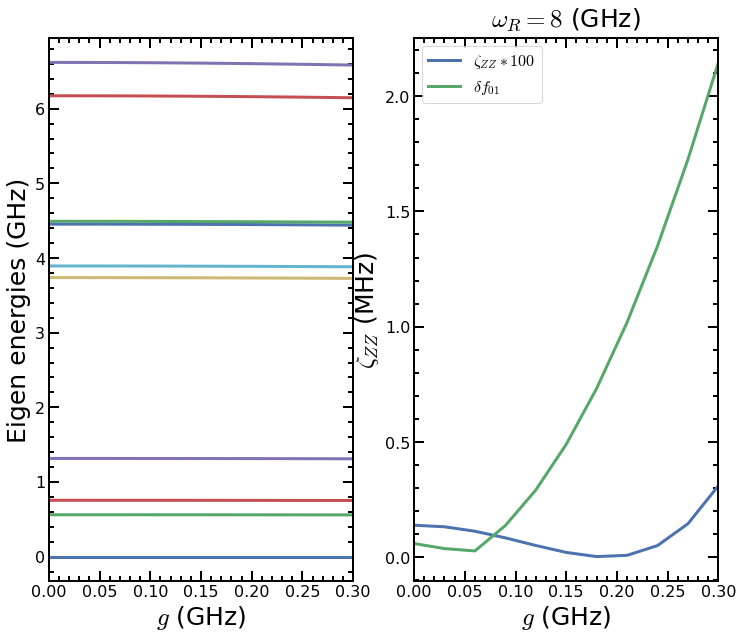

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for idx in range(10):
    ax1.plot(g_array, energies_res[:, idx]-energies_res[:, 0])
ax1.set_xlabel('$g$ (GHz)')
ax1.set_ylabel('Eigen energies (GHz)')
ax1.set_xlim([g_array[0], g_array[-1]])
# ax1.set_title('Capacitively coupled')

zz_rate = abs(energies_res[:, 3]-energies_res[:, 1] - energies_res[:, 2]+energies_res[:, 0])
energy_change = energies_res[:, 1]-energies_res[:, 0]
energy_change = abs(energy_change - 0.5605305155198061)
ax2.plot(g_array, zz_rate*1e5, label = '$\zeta_{ZZ}*100$')
ax2.plot(g_array, energy_change*1e3, label='$\delta f_{01}$')
ax2.set_xlabel('$g$ (GHz)')
ax2.set_ylabel('$\zeta_{ZZ}$ (MHz)')
ax2.set_xlim([g_array[0],g_array[-1]])
ax2.set_title('$\omega_R=8$ (GHz)')
ax2.legend()